Sales Prediction using simple linear regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
adv = pd.read_csv("advertising.csv")

In [3]:
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
adv.describe

<bound method NDFrame.describe of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [6]:
adv.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<Axes: >

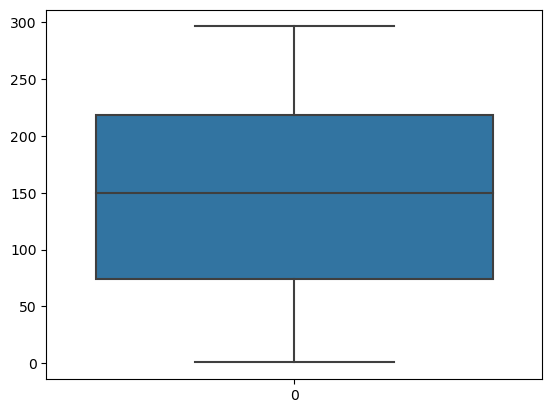

In [7]:
# outlier analysis
sns.boxplot(adv['TV'])

<Axes: >

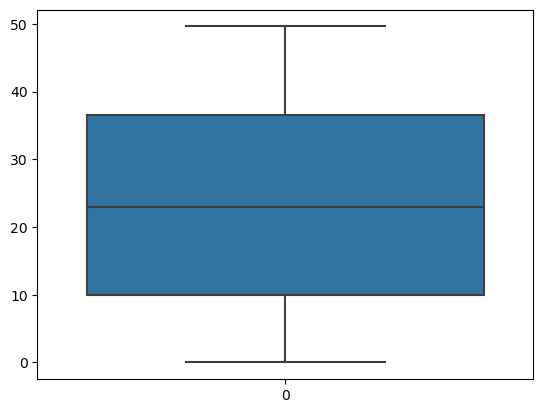

In [8]:
sns.boxplot(adv['Radio'])

<Axes: >

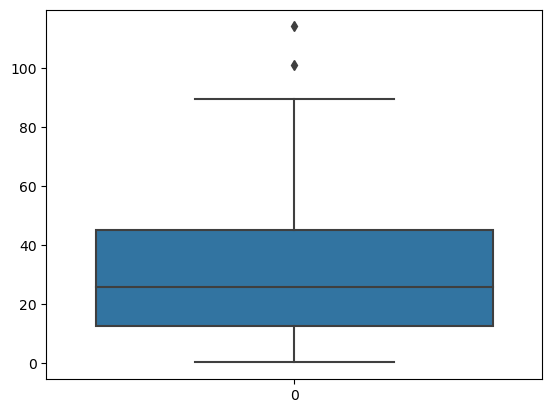

In [9]:
sns.boxplot(adv['Newspaper'])

<Axes: >

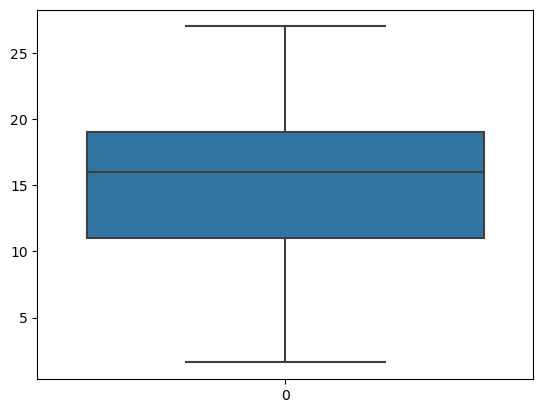

In [10]:
sns.boxplot(adv['Sales'])

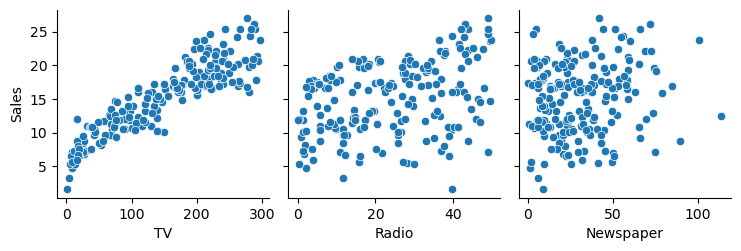

In [11]:
sns.pairplot(adv,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],kind='scatter')

<Axes: >

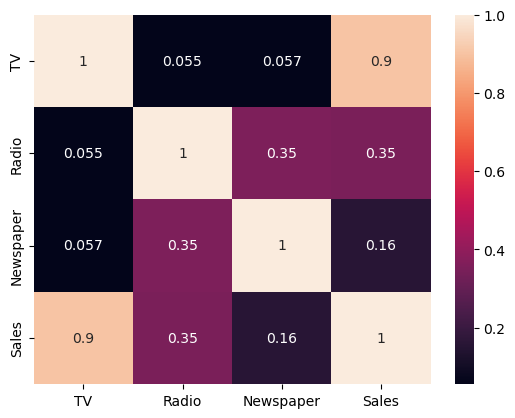

In [12]:
sns.heatmap(adv.corr(),annot=True)

In [13]:
X = adv['TV'].values.reshape(-1,1)
y = adv['Sales'].values.reshape(-1,1)

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,test_size=0.2)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
regressor = LinearRegression()

In [17]:
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
print("intercept:",regressor.intercept_)
print("coeffficient:",regressor.coef_)


intercept: [6.99133028]
coeffficient: [[0.05540477]]


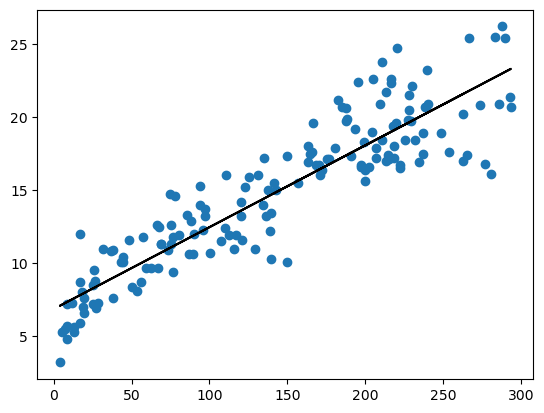

In [19]:
plt.scatter(X_train,y_train)
plt.plot(X_train,0.056*X_train+6.859,'black')

In [20]:
y_pred = regressor.predict(X_test)

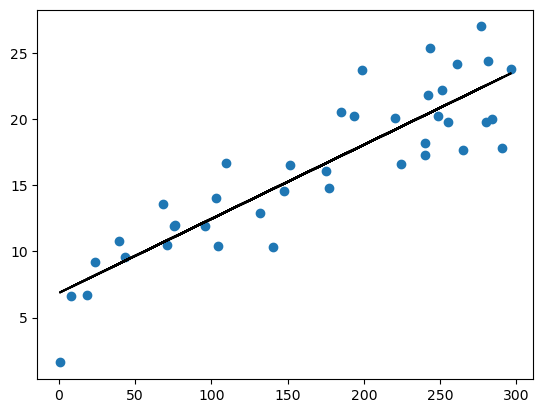

In [21]:
plt.scatter(X_test,y_test)
plt.plot(X_test,0.056*X_test+6.859,'black')

In [22]:
print(y_pred)

[[11.17439066]
 [22.74290732]
 [16.79797515]
 [19.20808279]
 [10.78101677]
 [17.69553248]
 [16.69270608]
 [ 8.30996388]
 [20.29401634]
 [10.90290727]
 [ 7.03011362]
 [15.38515343]
 [20.46577114]
 [22.51574775]
 [21.14170937]
 [11.21871448]
 [12.29356708]
 [20.75387596]
 [15.15245338]
 [19.40199949]
 [18.01133968]
 [ 9.37373553]
 [20.89238789]
 [20.27739491]
 [14.28813892]
 [23.41330508]
 [21.46859754]
 [21.68467615]
 [17.23567286]
 [20.38266398]
 [23.09749787]
 [ 7.42348751]
 [12.78666956]
 [14.76461997]
 [22.58223348]
 [13.07477438]
 [ 9.17981882]
 [12.68140049]
 [ 8.02739954]
 [22.332912  ]]


In [23]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [24]:
mean_squared_error(y_test,y_pred)

7.150436814212014

In [25]:
mean_absolute_error(y_test,y_pred)

2.1750598973872877

In [26]:
np.sqrt(mean_absolute_error(y_test,y_pred))

1.474808427351596

In [27]:
r2_score(y_test,y_pred)

0.7849575147355398

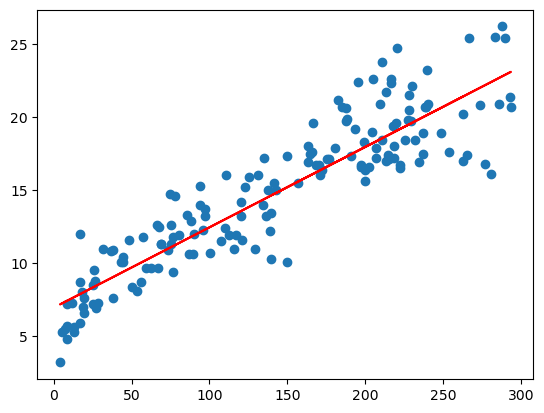

In [28]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487+ 0.055 * X_train, "r")
plt.show()

In [29]:
y_pred

array([[11.17439066],
       [22.74290732],
       [16.79797515],
       [19.20808279],
       [10.78101677],
       [17.69553248],
       [16.69270608],
       [ 8.30996388],
       [20.29401634],
       [10.90290727],
       [ 7.03011362],
       [15.38515343],
       [20.46577114],
       [22.51574775],
       [21.14170937],
       [11.21871448],
       [12.29356708],
       [20.75387596],
       [15.15245338],
       [19.40199949],
       [18.01133968],
       [ 9.37373553],
       [20.89238789],
       [20.27739491],
       [14.28813892],
       [23.41330508],
       [21.46859754],
       [21.68467615],
       [17.23567286],
       [20.38266398],
       [23.09749787],
       [ 7.42348751],
       [12.78666956],
       [14.76461997],
       [22.58223348],
       [13.07477438],
       [ 9.17981882],
       [12.68140049],
       [ 8.02739954],
       [22.332912  ]])

In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [31]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.6740300698032575

In [32]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.7849575147355398

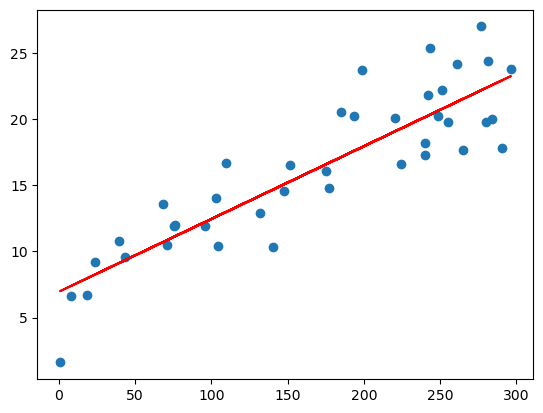

In [33]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.9487+ 0.055 * X_test, "r")
plt.show()